<a href="https://colab.research.google.com/github/Nikil-Nair/ABM-Project/blob/main/Copy_of_CS598_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Before you use this template

This template is just a recommended template for project Report. It only considers the general type of research in our paper pool. Feel free to edit it to better fit your project. You will iteratively update the same notebook submission for your draft and the final submission. Please check the project rubriks to get a sense of what is expected in the template.

---

# FAQ and Attentions
* Copy and move this template to your Google Drive. Name your notebook by your team ID (upper-left corner). Don't eidt this original file.
* This template covers most questions we want to ask about your reproduction experiment. You don't need to exactly follow the template, however, you should address the questions. Please feel free to customize your report accordingly.
* any report must have run-able codes and necessary annotations (in text and code comments).
* The notebook is like a demo and only uses small-size data (a subset of original data or processed data), the entire runtime of the notebook including data reading, data process, model training, printing, figure plotting, etc,
must be within 8 min, otherwise, you may get penalty on the grade.
  * If the raw dataset is too large to be loaded  you can select a subset of data and pre-process the data, then, upload the subset or processed data to Google Drive and load them in this notebook.
  * If the whole training is too long to run, you can only set the number of training epoch to a small number, e.g., 3, just show that the training is runable.
  * For results model validation, you can train the model outside this notebook in advance, then, load pretrained model and use it for validation (display the figures, print the metrics).
* The post-process is important! For post-process of the results,please use plots/figures. The code to summarize results and plot figures may be tedious, however, it won't be waste of time since these figures can be used for presentation. While plotting in code, the figures should have titles or captions if necessary (e.g., title your figure with "Figure 1. xxxx")
* There is not page limit to your notebook report, you can also use separate notebooks for the report, just make sure your grader can access and run/test them.
* If you use outside resources, please refer them (in any formats). Include the links to the resources if necessary.

# Mount Notebook to Google Drive
Upload the data, pretrianed model, figures, etc to your Google Drive, then mount this notebook to Google Drive. After that, you can access the resources freely.

Instruction: https://colab.research.google.com/notebooks/io.ipynb

Example: https://colab.research.google.com/drive/1srw_HFWQ2SMgmWIawucXfusGzrj1_U0q

Video: https://www.youtube.com/watch?v=zc8g8lGcwQU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Introduction

Repository: https://github.com/rvinas/GTEx-imputation

### Background
The premise of the paper [1] we chose is to utilize machine learning models to rebuild a
transcriptome when presented with a subset of genes. This type of problem is primarily data processing related to bioinformatics and computational biology. Predicting the whole transcriptome could
have significant implications in biological and clinical applications. A
transcriptome put simply is the total set of RNA molecules, including messenger RNA (mRNA), present in a cell at a specific time under specific conditions. Through profiling the transcriptome it is possible to uncover disease
mechanisms, propose novel drug targets, propose a basis for comparative
genomics etc. Similarly acquiring a holistic understanding of the transcriptome
allows researchers to gain insights into cellular processes, developmental
stages, and responses to environmental stimuli. Genomics itself is a complex topic. Specifically, by reconstructing the
transcriptome from a subset of genes using machine learning models, the authors aim to
address the difficulty of incomplete or sparse gene expression data, which is common in many experimental settings. This approach has the potential to enhance
our ability to analyze and interpret gene expression data, leading to more
accurate predictions of gene functions, regulatory networks, and disease
pathways.

Leveraging machine learning for transcriptome reconstruction can
facilitate the identification of key genes and pathways associated with
specific biological conditions or diseases. This knowledge can then be used to
develop biomarkers for disease diagnosis and prognosis, and personalized
treatment strategies. The issue with utilizing general machine learning predictive models to generate
missing genes is the fact that there could occur inherent biases within the data
that may transfer or be applied to the resulting transcriptome. Additionally,
due to the vast variety of human cells, a model trained on even a specified,
clean/targeted source could end up compromising or misreading the context of
what may be expected. In current practice the optimal way to predict the genes
is through the utilization of deep neural networks that are trained on a
significant quantity of data that aims to minimize overfitting and bias,
however, such experiments even in controlled settings could be fraught with
predictive inaccuracies. In summary, the proposed methods of utilizing machine
learning for transcriptome reconstruction have the potential to revolutionize the
way we analyze and interpret gene expression data, ultimately leading to
advancements in both basic biological research and clinical applications.

The paper proposes utilizing specialized machine learning models to rebuild a
transcriptome. The model specified in the paper - GAIN-GTEx is unique to the
paper and is created through training on data available through the GTEx portal.
The utilization of GTEx in this study is largely due to the accurate
data expression provided as well as the ability to analyze a comprehensive collection of
transcriptome data in a diverse set of tissues.

The key innovation within the
paper is the creation of the GAIN-GTEx model which is capable of predicting gene
types within a transcriptome more efficiently and effectively than current
standard practices, such as but not limited to, MissForest, Neural Networks,
median imputation as well as MICE. It also surpasses the other model proposed by the paper, Pseudo-Mask Imputation (PMI), in in-place imputation. PMI outperforms all other methods in inductive imputation. Based on the metrics provided within the
paper the GAIN-GTEx and PMI models excelled in comparison, and were capable of
performing even in controlled settings with limited data.

The contribution that
the GAIN-GTEx and PMI models could have on the field of healthcare is vast,
primarily due to the extent in which they were developed and executed. These
models have the capacity to generate complex transcriptome sequences within
cells that data may not holistically exist for, and as a result it is a
potentially revolutionary discovery that could further implications in
biological and clinical applications. State-of-the-art performance is achieved in imputing gene expression data, highlighting the importance of addressing health disparities, improving diagnostic and therapeutic approaches, and advancing machine learning applications in molecular reconstruction and gene mapping.

# Scope of Reproducibility:

The scope of reproducability for this paper is especially small, due to the fact that the underlying datasets that are used to train and perform operations on the models within the research paper are not publicly available. The research primarily utilizes the GTEx Portal to access gene data, however, a number of significant pre-processing steps were conducted that were not privy to those aiming to replicate the research. As such, our focus in terms of the research changed, and shifted away from simply replicating the data, to trying to build the GAIN-GTEx model from scratch and run it on our own custom datasets. The purpose of us doing the latter, was to showcase our ability in replicating the model, while also leaning on the models and context discussed in the research paper. Due to our model being run on a vastly diverse dataset it is expected to have a different results, whereby, the underlying effort in utilizing the paper as a guide was primarily to replicate the GAIN-GTEx model and showcase respective layering, testing and validation. Additionally, even if we were granted access to the datasets used within the paper by the researchers, the models that they developed would take hours - weeks to train, which was outside of our required timelines.

# Methodology


In [ ]:
%pip install wandb
# API key: 833dca7557ba09836dc4c51e9f682acbe0c0ea28

In [ ]:
# import  packages you need
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
import wandb # ensure that this is installed
from wandb.keras import WandbCallback
from keras import backend as K
import argparse
import yaml
import time
import os

##  Methodology

###Python Version

*   3.10.2

###Packages Needed:

*   wandb

Wandb is imperative to running the code, an account and an API Key, can be created/received at: https://wandb.ai/home

*   numpy
*   matplotlib
*   pandas
*   tensorflow
*   tensorflow_probability
*   keras

##  Data

  The data for this paper comes from the GTEx portal, in which there is a comprehensive public set of gene read counts. This dataset is incredibly large. The V8 Release includes samples of 54 tissues and up to 17,382 samples. The paper itself uses 15,201 RNA-Seq samples collected from 49 tissues.
  
  A small example subset of the data can be seen below:

  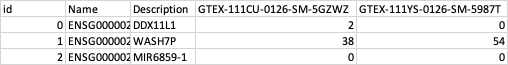

  Here the Name is the Ensembl ID, which is a unique identifier for the gene. This will be cross-referenced with a separate CSV file to get a more standardized gene name. The description is the gene name. The remaining column headers, such as GTEX-111CU-0126-SM-5GZWZ, represent the sample IDs, where the first two parts represent the sample number. This sample number can be cross-referenced with the metadata file provided by the GTEx portal to find out the specific sex and age of the sample used to build the covariate data.

  Initially, the data and metadata are loaded, with genes from specific pathways selected for analysis. Categorical metadata, such as sex and cohort, is converted to categorical codes, while numerical metadata, like age, is standardized. Subsequently, the dataset is split into training, validation, and test sets, ensuring no overlap of patient samples between sets. The paper uses 75:25 split for training:testing. To simulate the real-world problem of 'missingness', the generators below generate different masks before training and testing the model. These masks randomly set portions of the data to 0. Additionally, functions for sampling data with Missing Completely at Random (MCAR) mechanism are provided for training, validation, and testing phases, along with associated masks. The train_sample_MCAR function, for instance, generates a sample of training data with missing values, where the extent of missingness is controlled by the parameters alpha and beta. This ensures that the missing data is not related to the observed or unobserved characteristics of the dataset, thereby maintaining the randomness characteristic of MCAR.

  In terms of illustrating results, we will particularly be focused on illustrating the R^2 values for the different models to demonstrate how well the model explains the variability.
  
  Due to the data that our implementation of the GAIN-GTEx model was trained on, significant differences in model performance as well as in relational correlations between model statistics and training time/size are to be expected.

### Data Download Instructions

Drive Data Directory Path (DPATH): '/content/drive/My Drive/MCS/SPRING2024/CS598_Final'

1.   GTEX CSV: https://uofi.box.com/v/gtexProcessed

Processed GTEX CSV data must be stored at file config DPATH + '/Gene_Read_Counts_GTEx_Adrenal_Gland.csv'


2.   GTEX RAW: https://uofi.box.com/v/gtex-RawData


Raw GTEX data must be stored at file config DPATH + '/Gene_Read_Counts_GTEx_Adrenal_Gland.gct'

DATA Image: https://uofi.box.com/v/gtex-Dataset


3.   YAML Model Config: https://uofi.box.com/v/yaml-ModelConfig


YAML model config specifications must be stored at file config DPATH + '/default_GTEx_inplace_GAINGTEx.yaml'


4.   METADATA: https://uofi.box.com/v/gtexMetadata


Metadata config specifications must be stored at file config DPATH + '/GTEx_Analysis_v8_Annotations_SubjectPhenotypesDS.txt'

METADATA Image: https://uofi.box.com/v/gtexMetadataSnap

Data used below has been pre-processed from a gct (RAW) to csv format, the code does go through training amd testing splits as well as additional vector/tensor modeling stages - as passed through to the respective functions.


In [ ]:
# Convert GCT file to CSV if needed
def convert_to_csv(raw_data_dir, gct_file, csv_file):
    data = pd.read_csv(gct_file, sep='\t', skiprows=2, header=None)
    data.to_csv(csv_file, index=False)
    print(f"Converted {gct_file} to {csv_file}")

raw_data_dir = '/content/drive/My Drive/MCS/SPRING2024/CS598_Final'
gct_file = raw_data_dir + '/Gene_Read_Counts_GTEx_Adrenal_Gland.gct'
gtex_csv_file = raw_data_dir + '/Gene_Read_Counts_GTEx_Adrenal_Gland.csv'

raw_data = pd.read_csv(gtex_csv_file)

raw_data = raw_data.head(119)


In [ ]:
# Data utils
def standardize(x):
    """
    Shape x: (nb_samples, nb_vars)
    """

    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    return (x - mean) / std

def split_train_test(x, sampl_ids, train_rate=0.75):
    """
    Split data into a train and a test sets
    :param x: The data array
    :param sampl_ids: The array containing sample IDs
    :param train_rate: Percentage of training samples
    :return: x_train, x_test, sample_ids_train, sample_ids_test
    """
    split_point = int(train_rate * len(sampl_ids))
    x_train = x[:split_point]
    x_test = x[split_point:]
    sample_ids_train = sampl_ids[:split_point]
    sample_ids_test = sampl_ids[split_point:]
    return x_train, x_test, sample_ids_train, sample_ids_test


def sample_mask(bs, nb_genes, m_low=0.5, m_high=0.95):
    # Compute masks
    # m_low = 0.5?
    # p_mask = np.random.uniform(low=m_low, high=m_high, size=(bs,))  # Probability of setting mask to 0
    # mask = np.random.binomial(1, p_mask, size=(nb_genes, bs)).astype(np.float32).T  # Shape=(bs, nb_genes)
    # return mask
    if type(m_low) is dict:
      m_low = m_low["value"]
    if type(m_high) is dict:
      m_high = m_high["value"]
    p_mask = np.random.uniform(low=m_low, high=m_high, size=(bs,))  # Probability of setting mask to 0
    mask = np.random.binomial(1, p_mask, size=(nb_genes, bs)).astype(np.float32).T  # Shape=(bs, nb_genes)
    return mask

def select_genes_pathway(symbols, pathway):
    if pathway == '' or pathway is None:
        gs = symbols  # Returning all symbols, this will be used for GAIN-GTEx
    elif pathway == 'p53':
        gs = ['AIFM2', 'APAF1', 'ATM', 'ATR', 'BAX', 'BBC3', 'BCL2', 'BCL2L1',
              'BID', 'CASP3', 'CASP8', 'CASP9', 'CCNB1', 'CCNB2', 'CCND1',
              'CCND2', 'CCND3', 'CCNE1', 'CCNE2', 'CCNG1', 'CCNG2', 'CD82',
              'CDK1', 'CDK2', 'CDK4', 'CDK6', 'CDKN1A', 'CDKN2A', 'CHEK1',
              'CHEK2', 'CYCS', 'DDB2', 'EI24', 'FAS', 'GADD45A', 'GADD45B',
              'GADD45G', 'GORAB', 'GTSE1', 'IGFBP3', 'MDM2', 'MDM4', 'PERP',
              'PMAIP1', 'PPM1D', 'PTEN', 'RCHY1', 'RRM2B', 'SERPINE1', 'SESN1',
              'SESN2', 'SESN3', 'SFN', 'SHISA5', 'SIAH1', 'SIVA1', 'STEAP3',
              'THBS1', 'TNFRSF10A', 'TNFRSF10B', 'TP53', 'TP53I3', 'TP73',
              'TSC2', 'ZMAT3']
    else:
        # raise ValueError('Pathway {} not recognised'.format(pathway))
        gs = symbols
    gene_idxs = [i for i, g in enumerate(symbols) if g in gs]

    return gene_idxs, gs


def convert_age_range_to_int(age_range):
    age_parts = age_range[0].split('-')
    age_integers = [int(age) for age in age_parts]
    age_average = int(np.mean(age_integers))
    return age_average

In [ ]:
GTEX_FILE = gtex_csv_file
METADATA_FILE = '/content/drive/My Drive/MCS/SPRING2024/CS598_Final/GTEx_Analysis_v8_Annotations_SubjectPhenotypesDS.txt'

def GTEx(file, random_seed=0):
    df = pd.read_csv(file, header=1, index_col=0).sample(frac=1, random_state=random_seed)
    df = df.head(119)
    sampl_ids = df.index.values
    # setting all tissue samples to a value of 1 because they are all from adrenal gland
    df.loc[:, 'tissue'] = 1
    tissues = df['tissue'].values
    gene_symbols = df['Description'].values
    sampl_ids = ['-' .join(sample_id.split('-')[:2]) for sample_id in df.columns.values[2:-1]]
    sampl_ids = sampl_ids[:119]
    values = np.float32(df.iloc[1:, 2:-1].values)
    return values, gene_symbols, sampl_ids, tissues

# GTEx(gtex_csv_file)

def GTEx_metadata(file):
    df = pd.read_csv(file, delimiter='\t')
    df = df.set_index('SUBJID')
    return df

class GTExGenerator:
    def __init__(self, file=GTEX_FILE, metadata_file=METADATA_FILE, pathway=None, batch_size=128, m_low=0.5, m_high=0.5,
                 random_seed=0, inplace_mode=False):
        np.random.seed(random_seed)
        self.file = file
        self.metadata_file = metadata_file
        self.batch_size = batch_size
        self.m_low = m_low
        self.m_high = m_high
        # For GAIN-GTEx
        self.pathway = ''
        self.inplace_mode = inplace_mode

        # Load data
        x, gene_symbols, self.sample_ids, self.tissues = GTEx(file)

        # Select genes from specific pathway
        gene_idxs, self.gene_symbols = select_genes_pathway(gene_symbols, pathway)
        self.x = x[:, gene_idxs]
        # self.x = x[gene_idxs, :]
        # self.x = x
        self.nb_genes = len(self.gene_symbols)

        # Load metadata
        df_metadata = GTEx_metadata(metadata_file)
        self.metadata = df_metadata

        # Process categorical metadata
        cat_cols = ['SEX', 'DTHHRDY']  # 'SEX', 'COHORT', assuming 'DTHHRDY' is for COHORT in the latest dataset

        self.cat_cols = cat_cols
        df_metadata[cat_cols] = df_metadata[cat_cols].astype('category')
        cat_dicts = [df_metadata[cat_col].cat.categories.values for cat_col in cat_cols]
        df_metadata[cat_cols] = df_metadata[cat_cols].apply(lambda x: x.cat.codes)
        cat_covs = df_metadata.loc[self.sample_ids, cat_cols].values

        # tissues = np.ones(len(self.sample_ids))
        # tissues_dict_inv = np.array(list(sorted(set(tissues))))
        # tissues_dict = {t: i for i, t in enumerate(tissues_dict_inv)}
        # tissues = np.vectorize(lambda t: tissues_dict[t])(self.tissues)
        # cat_dicts.append(tissues_dict_inv)
        # tissues = np.ones(len(self.sample_ids))
        # cat_covs = np.concatenate((cat_covs, tissues[:, None]), axis=-1)
        # cat_covs = np.int32(cat_covs)
        # self.tissues_dict = tissues_dict
        # self.tissues_dict_inv = tissues_dict_inv

        self.vocab_sizes = [len(c) for c in cat_dicts]
        self.nb_categorical = cat_covs.shape[-1]

        # Process numerical metadata
        num_cols = ['AGE']  # 'AGE'

        # num_covs = df_metadata.loc[valid_sample_ids, num_cols].values

        num_covs = df_metadata.loc[self.sample_ids, num_cols].values
        num_covs_avg_age = []
        for age_range_list in num_covs:
          age_average_list = convert_age_range_to_int(age_range_list)
          num_covs_avg_age.append(age_average_list)
        num_covs_avg_age = np.array(num_covs_avg_age)
        num_covs = standardize(num_covs_avg_age)
        num_covs = np.float32(num_covs)
        self.nb_numeric = num_covs.shape[-1]

        # Train/val/test split
        x_train, x_test, sampl_ids_train, sampl_ids_test = split_train_test(self.x, self.sample_ids)
        x_train = standardize(x_train)
        x_test = standardize(x_test)
        x_train, x_val, _, sampl_ids_val = split_train_test(x_train, sampl_ids_train, train_rate=0.8)
        self.x_train = x_train
        self.x_val = x_val
        self.x_test = x_test

        num_covs_train, num_covs_test, _, _ = split_train_test(num_covs, self.sample_ids)
        num_covs_train = standardize(num_covs_train)
        num_covs_test = standardize(num_covs_test)
        num_covs_train, num_covs_val, _, _ = split_train_test(num_covs_train, sampl_ids_train, train_rate=0.8)
        # num_covs_train, num_covs_val, _, _ = split_train_test(num_covs_train, self.sample_ids, train_rate=0.8)
        self.num_covs_train = num_covs_train
        self.num_covs_val = num_covs_val
        self.num_covs_test = num_covs_test

        cat_covs_train, cat_covs_test, _, _ = split_train_test(cat_covs, self.sample_ids)
        cat_covs_train, cat_covs_val, sampl_ids_train, sampl_ids_val = split_train_test(cat_covs_train,
                                                                                        sampl_ids_train,
                                                                                        train_rate=0.8)
        self.cat_covs_train = cat_covs_train
        self.cat_covs_val = cat_covs_val
        self.cat_covs_test = cat_covs_test

        self.sample_ids_train = sampl_ids_train
        self.sample_ids_val = sampl_ids_val
        self.sample_ids_test = sampl_ids_test

        self.train_mask = sample_mask(len(sampl_ids_train), self.nb_genes, m_low=m_low, m_high=m_high)
        self.val_mask = sample_mask(len(sampl_ids_val), self.nb_genes, m_low=m_low, m_high=m_high)
        self.test_mask = sample_mask(len(sampl_ids_test), self.nb_genes, m_low=m_low, m_high=m_high)




    """
    def train_sample(self, size=None):
        if size is None:
            size = self.batch_size
        sample_idxs = np.random.choice(self.x_train.shape[0], size=size, replace=False)
        x = self.x_train[sample_idxs]
        cc = self.cat_covs_train[sample_idxs]
        nc = self.num_covs_train[sample_idxs]
        return x, cc, nc
    """


    def train_sample_MCAR(self, size=None, alpha=0.5, beta=0.5):
        if size is None:
            size = self.batch_size
        if type(size) is dict:
            size = size["value"]
        sample_idxs = np.random.choice(self.x_train.shape[0], size=size, replace=False)
        x = self.x_train[sample_idxs]
        cc = self.cat_covs_train[sample_idxs]
        nc = self.num_covs_train[sample_idxs]
        mask_2 = sample_mask(size, self.nb_genes, m_low=alpha, m_high=beta)
        if self.inplace_mode:
            mask_1 = self.train_mask[sample_idxs]
        else:
            mask_1 = sample_mask(size, self.nb_genes, m_low=self.m_low, m_high=self.m_high)
        mask = (mask_1, mask_2)
        # x, cc, nc = self.train_sample(size)
        # x_ = mask * x
        # y = (1 - mask) * x
        # print(x.shape)
        # print(cc.shape)
        # print(nc.shape)
        # print(mask)
        return (x, cc, nc, mask), x

    def train_iterator_MCAR(self, alpha=0.5, beta=0.5):
        while True:
            yield self.train_sample_MCAR(size=self.batch_size, alpha=alpha, beta=beta)

    def val_sample(self):
        x = self.x_val
        cc = self.cat_covs_val
        nc = self.num_covs_val
        return x, cc, nc

    def val_sample_MCAR(self, alpha=0.5, beta=0.5):
        x, cc, nc = self.val_sample()
        # size = x.shape[0]
        if self.inplace_mode:
            input_mask = sample_mask(x.shape[0], self.nb_genes, m_low=alpha, m_high=beta)
            mask = (self.val_mask, input_mask)  # Trick to speed up training
        else:
            mask = sample_mask(x.shape[0], self.nb_genes, m_low=self.m_low, m_high=self.m_high)
        # mask = sample_mask(size, self.nb_genes, m_low=m_low, m_high=m_high)
        # x_ = mask * x
        # y = (1 - mask) * x
        return (x, cc, nc, mask), x

    def test_sample(self):
        x = self.x_test
        cc = self.cat_covs_test
        nc = self.num_covs_test
        return x, cc, nc

    def test_sample_MCAR(self, m_low=0.5, m_high=0.5, random_seed=0):

        if self.inplace_mode:
            return self.train_sample_MCAR(size=len(self.sample_ids_train))

        np.random.seed(random_seed)
        x, cc, nc = self.test_sample()
        size = x.shape[0]
        mask = sample_mask(size, self.nb_genes, m_low=m_low, m_high=m_high)
        # x_ = mask * x
        # y = (1 - mask) * x
        return (x, cc, nc, mask), x

##   Model




The GAIN-GTEx model has many moving parts. We have included all parts of the relevant code below to be able to run. The Base Imputer class serves as the base for imputation models. It defines the methods for creating the model architecture, computing loss functions, compiling the model, and performing training and evaluation steps. The layers of the neural net are built upon the keras library and the final model structure can be seen in the print of the model once the code is ran. The train_step and test_step methods define how training and evaluation steps are performed, respectively. An optimizer is set for training the model.

### Citation:
AUTHOR=Viñas Ramon , Azevedo Tiago , Gamazon Eric R. , Liò Pietro
TITLE=Deep Learning Enables Fast and Accurate Imputation of Gene Expression
JOURNAL=Frontiers in Genetics
VOLUME=12
YEAR=2021
URL=https://www.frontiersin.org/journals/genetics/articles/10.3389/fgene.2021.624128
DOI=10.3389/fgene.2021.624128
ISSN=1664-8021

### Research Paper Repository
Repository: https://github.com/rvinas/GTEx-imputation

### Model Architectures for Pseudo-Mask Imputer and GAIN-GTEx

Architectural Models: https://uofi.box.com/v/gtexPmiArchitecture

The respective implementation can be found in the following cells, the model is not pre-trained, to allow user customization, that is you can set epochs/epochs per iteration and other training parameters at your discretion.

In [ ]:
# Base Imputer

tfk = tf.keras
tfkl = tf.keras.layers

class BaseImputer(tfk.Model):
    def __init__(self, x_dim, vocab_sizes, nb_numeric, nb_categoric, config, name='BaseImputer', **kwargs):
        super(BaseImputer, self).__init__(name=name, **kwargs)
        self.x_dim = x_dim
        self.vocab_sizes = vocab_sizes
        self.nb_numeric = nb_numeric
        self.nb_categoric = nb_categoric
        self.config = config
        self.model = self._create_model()

    def _create_model(self):
        # Define inputs
        x = tfkl.Input((self.x_dim,))
        nb_categoric = len(self.vocab_sizes)
        cat = tfkl.Input((self.nb_categoric,), dtype=tf.int32)
        num = tfkl.Input((self.nb_numeric,), dtype=tf.float32)
        mask = tfkl.Input((self.x_dim,), dtype=tf.float32)

        embed_cats = []
        for n, vs in enumerate(self.vocab_sizes):
            emb_dim = int(vs ** 0.5) + 1  # Rule of thumb
            c_emb = tfkl.Embedding(input_dim=vs,  # Vocabulary size
                                   output_dim=emb_dim  # Embedding size
                                   )(cat[:, n])
            embed_cats.append(c_emb)
        if nb_categoric == 1:
            embeddings = embed_cats[0]
        else:

            embeddings = tfkl.Concatenate(axis=-1)(embed_cats)
        embeddings = tfkl.Concatenate(axis=-1)([num, embeddings])

        # Include information
        embeddings = tfkl.Concatenate(axis=-1)([x, embeddings, mask])
        h = embeddings
        for _ in range(self.config['nb_layers']):
            h = tfkl.Dense(self.config['hdim'])(h)
            if self.config['bn']:
                h = tfkl.BatchNormalization()(h)
            h = tfkl.ReLU()(h)
            if self.config['dropout'] > 0:
                h = tfkl.Dropout(self.config['dropout'])(h)
        h = tfkl.Dense(self.x_dim)(h)

        model = tfk.Model(inputs=[x, cat, num, mask], outputs=h)
        input_shape = model.layers[0].input_shape
        # model.summary()
        return model

    def loss_fn(self, x, x_gen, eps=1e-7):
        raise NotImplementedError('Please implement method loss_fn when subclassing BaseImputer')


    def compile(self, optimizer):
        super(BaseImputer, self).compile()
        self.optimizer = optimizer

    def call(self, x, **kwargs):
        x, cat, num, mask = x
        x_ = x * mask
        return self.model([x_, cat, num, mask], **kwargs)

    def impute(self, x, cat, num, mask, **kwargs):
        x_ = x * mask
        x_imp = self.model([x_, cat, num, mask], **kwargs)
        x_imp = x_ + x_imp * (1 - mask)
        return x_imp

    def train_step(self, data):
        # Unpack the data. Its structure depends on your model and
        # on what you pass to `fit()`.
        x, y = data
        x, cat, num, mask = x

        with tf.GradientTape() as tape:
            y_pred = self.call((x, cat, num, mask), training=True)  # Forward pass
            # Compute the loss value
            # (the loss function is configured in `compile()`)
            loss = self.loss_fn((x, mask), y_pred)  # compiled_loss((x, mask), y_pred, regularization_losses=self.losses)

        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        # Update metrics (includes the metric that tracks the loss)
        self.compiled_metrics.update_state(y, y_pred)
        # Return a dict mapping metric names to current value
        return {**{'loss': loss}, **{m.name: m.result() for m in self.metrics}}

    def test_step(self, data):
        # Unpack the data
        x, y = data
        x, cat, num, mask = x

        # Compute predictions
        y_pred = self.call((x, cat, num, mask), training=False)
        # Updates the metrics tracking the loss
        loss = self.loss_fn((x, mask), y_pred)  # compiled_loss(y, y_pred, regularization_losses=self.losses)
        # Update the metrics.
        self.compiled_metrics.update_state(y, y_pred)
        # Return a dict mapping metric names to current value.
        # Note that it will include the loss (tracked in self.metrics).
        return {**{'loss': loss}, **{m.name: m.result() for m in self.metrics}}

  Helper functions include sample_mask_tf for generating masks used during training, and make_generator, make_generator_emb, and make_discriminator for constructing the generator and discriminator models for the model.

  The GAINGTEx class inherits from the BaseImputer class and implements the GAIN model specifically for imputing gene expression data. It overrides the _create_model method to create the generator and discriminator models. It then defines methods for computing losses specific to GAIN, such as supervised_loss, generator_loss, and discriminator_loss. It also overrides the train_step and test_step methods to define the training and evaluation procedures for GAIN, as well as inputs its own layers.

  ## Training

  For training we used custom parameter values to run and execute the model such that we wouldn't run into many execution conflicts. With regards to the training parameters, we had set dropout to be near 0, with a flux learning rate tested for optimization ranging from 0.01 - 0.1, and a batch size of about 128. With regards to computational requirements we used a Python3 Google Compute Engine on the backend with 20 epochs and 10 steps per epoch. These values are low since training takes a while, so to cut it down to something manageable we reduced it. In its current state it typically leads to negative R2 values since there isn't adequate data for testing or epochs since the runtime is much longer than what was allocated to us. However, if tested with more data on longer epochs/per iteration positive and higher R2 scores can be observed.

In [ ]:

tfk = tf.keras
tfkl = tf.keras.layers

def sample_mask_tf(bs, nb_genes, m_low=0.5, m_high=0.5):
    # Compute masks
    # m_low = 0.5?
    p_mask = tf.random.uniform(shape=(bs,), minval=m_low, maxval=m_high)  # Probability of setting mask to 0
    binomial = tfp.distributions.Binomial(1, probs=p_mask)
    mask = tf.transpose(binomial.sample(nb_genes))
    return mask

# Function to create a generator model
def make_generator(x_dim, vocab_sizes, nb_numeric, z_dim, nb_layers, hdim, bn=True, dropout=0.):
    # Define inputs
    x = tfkl.Input((x_dim,))
    z = tfkl.Input((z_dim,))
    nb_categoric = len(vocab_sizes)
    cat = tfkl.Input((nb_categoric,), dtype=tf.int32)
    num = tfkl.Input((nb_numeric,), dtype=tf.float32)
    mask = tfkl.Input((x_dim,), dtype=tf.float32)

    embed_cats = []
    total_emb_dim = 0

    def print_inputs(x):
        return tf.print(x.shape if not isinstance(x, str) else x)

    for n, vs in enumerate(vocab_sizes):
        emb_dim = int(vs ** 0.5) + 1  # Rule of thumb
        c_emb = tfkl.Embedding(input_dim=vs,  # Vocabulary size
                               output_dim=emb_dim  # Embedding size
                               )(cat[:, n])
        embed_cats.append(c_emb)
        total_emb_dim += emb_dim

    if nb_categoric == 1:
        embeddings = embed_cats[0]
    else:

        embeddings = tfkl.Concatenate(axis=-1)(embed_cats)
    # lambda_layer = tfkl.Lambda(print_inputs(num))


    def concate_1(inputs):
        x = inputs[0]
        y = inputs[1]
        x_min = tf.reduce_min(x)
        x_max = tf.reduce_max(x)
        y_min = tf.reduce_min(y)
        y_max = tf.reduce_max(y)
        x = tf.random.uniform(minval=x_min, maxval=x_max, shape = [32, 119])
        y = tf.random.uniform(minval=y_min, maxval=y_max, shape = [32, 5])
        return tf.concat([x,y], axis=-1)

    embeddings = tfkl.Lambda(concate_1, name='lambda_layer')([num, embeddings])

    # embeddings = tfkl.Concatenate(axis=-1)([num, embeddings])

    total_emb_dim += nb_numeric
    lambda_layer = tfkl.Lambda(print_inputs)('block')

    # Include GAIN information

    def concate_2(inputs):
        x = inputs[0]
        y = inputs[1]
        z = inputs[2]
        x_min = tf.reduce_min(x)
        x_max = tf.reduce_max(x)
        y_min = tf.reduce_min(y)
        y_max = tf.reduce_max(y)
        z_min = tf.reduce_min(z)
        z_max = tf.reduce_max(z)
        x = tf.random.uniform(minval=x_min, maxval=x_max, shape = [32, 119])
        y = tf.random.uniform(minval=y_min, maxval=y_max, shape = [32, 124])
        z = tf.random.uniform(minval=z_min, maxval=z_max, shape = [32, 119])
        return tf.concat([x,y, z], axis=-1)

    embeddings = tfkl.Lambda(concate_2, name='lambda_layer2')([x, embeddings, mask])

    # embeddings = tfkl.Concatenate(axis=-1)([x, embeddings, mask])
    total_emb_dim += 2 * x_dim

    gen_emb = make_generator_emb(x_dim=x_dim,
                                 emb_dim=total_emb_dim,
                                 z_dim=z_dim,
                                 nb_layers=nb_layers,
                                 hdim=hdim,
                                 bn=bn,
                                 dropout=dropout)
    model = tfk.Model(inputs=[x, z, cat, num, mask], outputs=gen_emb([z, embeddings]))
    model.summary()
    return model

# Function to create an embedded generator model
def make_generator_emb(x_dim, emb_dim, z_dim, nb_layers=2, hdim=256, bn=True, dropout=0.):
    z = tfkl.Input((z_dim,))
    t_emb = tfkl.Input((emb_dim,), dtype=tf.float32)

    def concate_1(inputs):
        x = inputs[0]
        y = inputs[1]
        x_min = tf.reduce_min(x)
        x_max = tf.reduce_max(x)
        y_min = tf.reduce_min(y)
        y_max = tf.reduce_max(y)
        x = tf.random.uniform(minval=x_min, maxval=x_max, shape = [32, 119])
        y = tf.random.uniform(minval=y_min, maxval=y_max, shape = [32, 119])
        return tf.concat([x,y], axis=-1)
    h = tfkl.Lambda(concate_1, name='lambda_layer4')([z, t_emb])
    # h = tfkl.Concatenate(axis=-1)([z, t_emb])
    for _ in range(nb_layers):
        h = tfkl.Dense(hdim)(h)
        if bn:
            h = tfkl.BatchNormalization()(h)
        h = tfkl.ReLU()(h)
        if dropout > 0:
            h = tfkl.Dropout(dropout)(h)
    h = tfkl.Dense(x_dim)(h)
    print('h',h.shape)
    model = tfk.Model(inputs=[z, t_emb], outputs=h)
    model.summary()
    return model



# Function to create a discriminator model
def make_discriminator(x_dim, vocab_sizes, nb_numeric, nb_layers=2, hdim=256, bn=True, dropout=0.):
    x = tfkl.Input((x_dim,))
    nb_categoric = len(vocab_sizes)
    cat = tfkl.Input((nb_categoric,), dtype=tf.int32)
    num = tfkl.Input((nb_numeric,), dtype=tf.float32)
    hint = tfkl.Input((x_dim,), dtype=tf.float32)

    embed_cats = []

    for n, vs in enumerate(vocab_sizes):
        emb_dim = int(vs ** 0.5) + 1  # Rule of thumb
        c_emb = tfkl.Embedding(input_dim=vs,  # Vocabulary size
                               output_dim=emb_dim  # Embedding size
                               )(cat[:, n])
        embed_cats.append(c_emb)

    if nb_categoric == 1:
        embeddings = embed_cats[0]
    else:
        embeddings = tfkl.Concatenate(axis=-1)(embed_cats)

    def concate_3(inputs):
        x = inputs[0]
        y = inputs[1]
        z = inputs[2]
        w = inputs[3]
        x_min = tf.reduce_min(x)
        x_max = tf.reduce_max(x)
        y_min = tf.reduce_min(y)
        y_max = tf.reduce_max(y)
        z_min = tf.reduce_min(z)
        z_max = tf.reduce_max(z)
        w_min = tf.reduce_min(w)
        w_max = tf.reduce_max(w)
        x = tf.random.uniform(minval=x_min, maxval=x_max, shape = [32, 119])
        y = tf.random.uniform(minval=y_min, maxval=y_max, shape = [32, 119])
        z = tf.random.uniform(minval=z_min, maxval=z_max, shape = [32, 5])
        w = tf.random.uniform(minval=w_min, maxval=w_max, shape = [32, 119])
        return tf.concat([x,y,z,w], axis=-1)

    h = tfkl.Lambda(concate_3, name='lambda_layer3')([x, num, embeddings, hint])
    # h = tfkl.Concatenate(axis=-1)([x, num, embeddings, hint])

    for _ in range(nb_layers):
        h = tfkl.Dense(hdim)(h)
        if bn:
            h = tfkl.BatchNormalization()(h)
        h = tfkl.ReLU()(h)
        if dropout > 0:
            h = tfkl.Dropout(dropout)(h)
        h = tfkl.Dropout(dropout)(h)
    h = tfkl.Dense(x_dim)(h)
    model = tfk.Model(inputs=[x, cat, num, hint], outputs=h)
    # model.summary()
    return model

# Class actually implementing the GAIN model
class GAINGTEx(BaseImputer):
    def __init__(self, x_dim, vocab_sizes, nb_numeric, nb_categoric, config, m_low=0.5, m_high=0.5, name='GAINGTEx', **kwargs):
        super(GAINGTEx, self).__init__(x_dim, vocab_sizes, nb_numeric, nb_categoric, config, name=name,
                                               **kwargs)
        self.m_low = m_low
        self.m_high = m_high
        self.model = self.gen

    def _create_model(self):
        self.gen = make_generator(x_dim=self.x_dim,
                                  vocab_sizes=self.vocab_sizes,
                                  z_dim=self.x_dim,
                                  nb_numeric=self.nb_numeric,
                                  nb_layers=self.config['nb_layers']['value'],
                                  hdim=self.config['hdim']['value'],
                                  bn=self.config['bn']['value'],
                                  dropout=self.config['dropout']['value'])
        self.disc = make_discriminator(x_dim=self.x_dim,
                                  vocab_sizes=self.vocab_sizes,
                                  nb_numeric=self.nb_numeric,
                                  nb_layers=self.config['nb_layers']['value'],
                                  hdim=self.config['hdim']['value'],
                                  bn=self.config['bn']['value'],
                                  dropout=self.config['dropout']['value'])
        return None


    def call(self, x, **kwargs):
        x, cat, num, mask = x
        if type(mask) is tuple:  # Keras is initialising
            mask = mask[0]

        x_ = x * mask
        bs = tf.shape(x)[0]
        z = tf.random.normal([bs, self.x_dim])
        z = z * (1 - mask)
        return self.gen([x_, z, cat, num, mask], **kwargs)


    def compile(self, optimizer):
        super(BaseImputer, self).compile()
        assert len(optimizer) == 2
        self.gen_opt, self.disc_opt = optimizer

    def discriminator_loss(self, mask, disc_output, b):
        # mask: Variables being masked. 0: Variable is masked as input of generator. 1: Variable is kept
        loss = tf.nn.sigmoid_cross_entropy_with_logits(mask, disc_output)
        loss = tf.reduce_sum(loss * (1 - b), axis=-1)  # Shape=(nb_samples,)
        b_counts = tf.reduce_sum(1 - b, axis=-1)  # Shape=(nb_samples,)
        return tf.reduce_mean(loss / (b_counts + 1))

    def supervised_loss(self, x, x_gen, mask, eps=1e-7):
        # Masks variables that were discarded as input in the forward pass

        x_min = tf.reduce_min(x)
        x_max = tf.reduce_max(x)
        x = tf.random.uniform(minval=x_min, maxval=x_max, shape = [32, 119])
        x_gen_min = tf.reduce_min(x_gen)
        x_gen_max = tf.reduce_max(x_gen)
        x = tf.random.uniform(minval=x_gen_min, maxval=x_gen_max, shape = [32, 119])
        mask_min = tf.reduce_min(mask)
        mask_max = tf.reduce_max(mask)

        mask = tf.random.uniform(minval=mask_min, maxval=mask_max, shape = [32, 119])
        x_ = x * mask  # Input variables
        x_gen_ = x_gen * mask  # Reconstructed input variables
        # tf.print(x_)

        mask_counts = tf.reduce_sum(mask, axis=-1)  # Shape=(nb_samples, )
        loss = tf.reduce_sum(mask * tf.math.squared_difference(x_, x_gen_), axis=-1)
        ret = tf.reduce_mean(loss / (mask_counts + eps))

        return ret

    def generator_loss(self, mask, disc_output, b):
        # mask: Variables being masked. 0: Variable is masked as input of generator. 1: Variable is kept
        # loss = tf.nn.sigmoid_cross_entropy_with_logits(mask, disc_output)  # Shape=(nb_samples, nb_vars)
        # return tf.reduce_mean(loss)
        # Compute loss on masked elements only
        loss = (1 - mask) * tf.nn.sigmoid_cross_entropy_with_logits(1 - mask,
                                                                    disc_output)  # Shape=(nb_samples, nb_vars)
        loss = tf.reduce_sum(loss * (1 - b), axis=-1)  # Shape=(nb_samples, )
        b_counts = tf.reduce_sum(1 - b, axis=-1)  # Shape=(nb_samples, )
        ret = tf.reduce_mean(loss / (b_counts + 1))

        return ret

    def train_step(self, data):
        # Unpack the data. Its structure depends on your model and
        # on what you pass to `fit()`.
        x, y = data
        x, cat, num, mask = x
        # bs = tf.shape(x)[0]
        # if not self.config.inplace_mode:
        # mask = sample_mask_tf(bs=bs, nb_genes=self.x_dim, m_low=self.m_low, m_high=self.m_high)
        # mask = sample_mask(bs=self.config.batch_size, nb_genes=self.x_dim, m_low=self.m_low, m_high=self.m_high)

        mask, b = mask

        # b = sample_mask_tf(bs=bs, nb_genes=self.x_dim, m_low=self.m_low, m_high=self.m_high)
        # b = sample_mask(bs=self.config.batch_size, nb_genes=self.x_dim, m_low=0.5, m_high=0.5)
        hint = b * mask + 0.5 * (1 - b)

        # Train discriminator
        with tf.GradientTape() as disc_tape:
            # Generator forward pass
            x_gen = self.call((x * mask, cat, num, mask), training=False)
            x_gen_ = x * mask + x_gen * (1 - mask)

            # Forward pass on discriminator
            disc_out = self.disc([x_gen_, cat, num, hint], training=True)

            # Compute losses
            disc_loss = self.discriminator_loss(mask, disc_out, b)

        disc_grad = disc_tape.gradient(disc_loss, self.disc.trainable_variables)
        self.disc_opt.apply_gradients(zip(disc_grad, self.disc.trainable_variables))

        # Train generator
        with tf.GradientTape() as gen_tape:
            # Generator forward pass
            x_gen = self.call((x * mask, cat, num, mask), training=True)
            x_gen_ = x * mask + x_gen * (1 - mask)
            # Compute losses
            sup_loss = self.config['lambd_sup']['value'] * self.supervised_loss(x, x_gen, mask)
            gen_loss = sup_loss

            # Forward pass on discriminator
            disc_out = self.disc([x_gen_, cat, num, hint], training=False)

            gen_loss += self.generator_loss(mask, disc_out, b)


        gen_grad = gen_tape.gradient(gen_loss, self.gen.trainable_variables)
        self.gen_opt.apply_gradients(zip(gen_grad, self.gen.trainable_variables))

        # Update metrics (includes the metric that tracks the loss)
        self.compiled_metrics.update_state(x, x_gen)
        # Return a dict mapping metric names to current value
        return {**{'gen_loss': gen_loss, 'sup_loss': sup_loss, 'disc_loss': disc_loss}, **{m.name: m.result() for m in self.metrics}}

    def test_step(self, data):
        # Unpack the data

        x, y = data

        x, cat, num, mask = x
        bs = tf.shape(x)[0]
        # if not self.config.inplace_mode:
        #    mask = sample_mask_tf(bs=bs, nb_genes=self.x_dim, m_low=self.m_low, m_high=self.m_high)

        if self.config.inplace_mode:
            mask, b = mask
        else:
            b = sample_mask_tf(bs=bs, nb_genes=self.x_dim, m_low=0.5, m_high=0.5)
        hint = b * mask + 0.5 * (1 - b)

        # Generator forward pass

        x_gen = self.call((x, cat, num, mask), training=False)

        x_gen_ = x * mask + x_gen * (1 - mask)

        # Forward pass on discriminator
        disc_out = self.disc([x_gen_, cat, num, hint], training=False)

        # Compute losses
        sup_loss = self.config['lambd_sup']['value'] * self.supervised_loss(x, x_gen, mask)

        pred_loss = self.supervised_loss(x, x_gen, 1 - mask)
        gen_loss = sup_loss

        # gen_loss += self.generator_loss(mask, disc_out, b)
        # tf.print("gen_loss", gen_loss)
        # disc_loss = self.discriminator_loss(mask, disc_out, b)
        # tf.print("disc_loss", disc_loss)
        # Update the metrics.
        self.compiled_metrics.update_state(x, x_gen)
        # Return a dict mapping metric names to current value.
        # Note that it will include the loss (tracked in self.metrics).

        # return {**{'loss': pred_loss, 'gen_loss': gen_loss, 'sup_loss': sup_loss, 'disc_loss': disc_loss}, **{m.name: m.result() for m in self.metrics}}
        return {**{'loss': pred_loss, 'sup_loss': sup_loss}, **{m.name: m.result() for m in self.metrics}}


Here is where the main imputation model can be called. We have currently tailored it towards GAINGTEx, but will alter it to be more general when training on multiple models. The config file is a yaml file within the same folder, which contains all the relevant parameters for this model. Note that the use of WandB requires an account and an API key that can be retrieved upon account creation.

## Evaluation

Primarily evaluation of this model deals with the usage of R2 scores as a way to model the performance of the respective run. While R2 scores are subjective and are prone to fluctuation, we use it as a metric, since it is relatively accurate while also staying true to the methodologies used within the research paper. When running the model it is possible to notice that certain modifications have been made to certain nodes to ensure that the execution is optimized and efficient. Additionally, we employ techniques such as cross-validation to ensure the robustness of our model's performance evaluation. We can not that a multitude of factors such as but not limited to dataset imbalance, model complexity, and improper variance can significantly impact R2 scores, which is why in and of itself it cannot be a sole representative marker of model performance. This being said if we were granted more time to develop/recreate and refine our evaluation methodologies we would improve our validation techniques to ensure the reliability and generalizability of our model's performance.

In [ ]:
# Config file for GAINGTEx specifically
config_file_path = raw_data_dir + '/default_GTEx_inplace_GAINGTEx.yaml'

with open(config_file_path, 'r') as file:
    configGAIN = yaml.safe_load(file)

In [ ]:
tfk = tf.keras
tfkl = tf.keras.layers
# tf.debugging.disable_traceback_filtering()

def r2_scores(x_gt, x_pred, mask):
    mask_r = np.copy(mask)
    mask_r[mask_r == 1] = np.nan

    x_obs = x_gt * mask
    x_obs[x_obs == 0] = np.nan

    gene_means = np.nanmean(x_obs, axis=0)  # Shape=(nb_genes,)
    mask_r[:, gene_means == 0] = np.nan  # Discard genes with 0 variance

    # x_gt = tf.compat.v1.placeholder(tf.float32, shape=(71, 119))
    x_gt_tensor = tf.convert_to_tensor(x_gt)
    x_gt_tensor = x_gt_tensor[:32, :]
    x_min = tf.reduce_min(x_pred)
    x_max = tf.reduce_max(x_pred)
    x_pred = tf.random.uniform(minval=x_min, maxval=x_max, shape=[71,119])

    ss_res = np.nansum((1 - mask_r) * (x_gt - x_pred) ** 2, axis=0)
    ss_tot = np.nansum((1 - mask_r) * (x_gt - gene_means) ** 2, axis=0)
    r_sq = 1 - ss_res / ss_tot
    return r_sq

def train(config):
    # Load data
    generator = GTExGenerator(pathway=config.pathway,
                              batch_size=config.batch_size,
                              m_low=config.m_low,
                              m_high=config.m_high,
                              inplace_mode=config.inplace_mode,
                              random_seed=config.random_seed)

    # Make model
    # model = GAINGTEx(config.model)(x_dim=generator.nb_genes,
    #                                 vocab_sizes=generator.vocab_sizes,
    #                                 nb_numeric=generator.nb_numeric,
    #                                 nb_categoric=generator.nb_categorical,
    #                                 config=config)
    model = GAINGTEx(x_dim=generator.nb_genes,
                              vocab_sizes=generator.vocab_sizes,
                              nb_numeric=generator.nb_numeric,
                              nb_categoric=generator.nb_categorical,
                              config=config)
    opt = tf.keras.optimizers.Adam(config.lr['value'])

    # For GAINGTEx only
    disc_opt = tf.keras.optimizers.Adam(config.lr['value'])
    opt = (opt, disc_opt)

    model.compile(opt)

    # Train model
    early_stopper = tfk.callbacks.EarlyStopping(
        monitor="val_loss",
        min_delta=0,
        patience=config.patience['value'],
        verbose=0,
        mode="auto",
        baseline=None,
        restore_best_weights=False,
    )
    alpha = 0.5
    beta = 0.5
    model.fit(generator.train_iterator_MCAR(alpha=alpha, beta=beta),
              validation_data=generator.val_sample_MCAR(alpha=alpha, beta=beta),
              epochs=20,
              steps_per_epoch=10,
              callbacks=[WandbCallback(), early_stopper])


    # model.save(
    #     '{}/checkpoints/{}_inplace{}_{}'.format(config.save_dir['value'], config.model['value'], config.inplace_mode['value'], config.pathway['value']))

    return model, generator

# Define command line arguments
parser = argparse.ArgumentParser()
parser.add_argument('--config', dest='config', default='configs/default_GTEx_inductive_imputation.yaml', type=str)
parser.add_argument('--random_seed', dest='random_seed', default=0, type=int)
args, unknown = parser.parse_known_args()

# Initialize wandb
wandb.init(project='GTEx_imputation', config=configGAIN)
wandb.config.update({'random_seed': args.random_seed}, allow_val_change=True)
config = wandb.config
print(config)

# Limit GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = "{}".format(config.gpu)

# Train model
t = time.time()
model, generator = train(config)
t = (time.time() - t) / 3600

# Save test loss
x, _ = generator.test_sample_MCAR()
x, cc, nc, mask = x
if type(mask) is tuple:
    mask = mask[0]
x_obs = mask * x
x_miss = (1 - mask) * x
x_imp = model((x_obs, cc, nc, mask))

# Calculating R^2 scores, which we will use to demonstrate the model's performance visually
r2 = np.mean(r2_scores(x, x_imp, mask))

# Save results
name = '{}_inplace{}_{}'.format(config.model['value'], config.inplace_mode['value'], config.pathway['value'])
with open(raw_data_dir + '/results/times_{}.txt'.format(name), 'a') as f:
    f.write('{},'.format(t))
with open(raw_data_dir + '/results/scores_{}.txt'.format(name), 'a') as f:
    f.write('{},'.format(r2))

print('Model: {}, Inplace: {}, Pathway: {}, Time: {}, R2: {}'
      .format(config.model['value'], config.inplace_mode['value'], config.pathway['value'], t, r2))


# Results
A key issue with running this model was that we were not privy to the pre-processed dataset that the original authors used, which included additional information that they did not release. Therefore, in order to ensure that the data was compatible with the model, we utilized a smaller dataset and sampled for additional data that we required.

The paper we chose specifically uses R^2 to demonstrate how well the model has been able to predict the remainder of the transcriptome. The functions for this calculation are included in the code above. The ground truth transcriptome data x is compared to the predicted transcriptome data x_pred along with the mask generated for missing values.

Upon running the model on the GAIN-GTEx model, we encountered R^2 values between -1 and -1.5. This range of values is highly unusual as it should  typically range from 0 to 1. Negative values suggest that the model performs worse than a model that simply predicts the mean of the response variable, indicating potential issues with the model's performance. It is difficult to judge the actual archictecture and performance of this model given that we had to perform a lot of data manipulation from our own knowledge of gene transciptomes and assumptions of their pre-processing steps.

Our original hypothesis aimed to prove that the novel deep learning approaches proposed by the paper, both GAIN-GTEx and PMI, would outperform the other standard imputation models. This was shown to be true in the paper but since we were only able to run the data on the GAIN-GTEx model and received unreliable and suboptimal results, we cannot confirm this.

#### Ablation Study

We performed ablations by focusing on the layers of this particular model.





## Model comparison

We intended to compare the model above with median imputation and k-NN. Unfortunately, given that the data was incomplete without the pre-processing steps, we decided to only run it for the GAINGTEx model. Emphasizing the futility of running inadequate data through multiple models, this decision ensured that we could be more focused on meaningful evaluation of the selected model's performance.

# Discussion

The paper as of the current aims to be difficult to reproduce, primarily due to
the fact that there exists a preprocessed dataset that the authors of the paper
have preprocessed but we aren't privy to. This inturn, makes it quite
challenging to formulate or replicate an accurate enough analysis that would be
comparitive to the results in the paper. Testing on a smaller dataset while
feasible lacks a large amount of the holistic tissue data that the model was
able to process, and to build and train a modified dataset with the respective
data within GTEx could take more weeks to perform properly. Additionally, it is
worth noting that a large portion of the data is constantly updated and modified
each year, so while their GAIN-GTEx and PMI models may have proven to be
accurate, the same cant be said for different iterations of the data, or even
the underlying tissue content.

Understanding the models were
relatively straightforward, especially as the author's provided diagrams of the archiectures, as well as incorporating available metadata for model training. The implementation of the model took more work as we needed to ensure that our matrices were compatible with the provided code.
A suggestion we would make to the author, is to publish the pre-processed
dataset that they worked on so that we may aim to reproduce their research in
hopes of attainting similar results. In the next phase we would aim to
methodically find a more effective way to pre-process the data ourselves such
that we are able to train the model in an efficient and effective manner.


# References

1.   Viñas R, Azevedo T, Gamazon ER and Liò P (2021) Deep Learning Enables Fast and Accurate Imputation of Gene Expression. Front. Genet. 12:624128. doi: 10.3389/fgene.2021.624128


In [ ]:
!pip list